# 第7课：线性模型

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## 1.Statistical models and patsy formula

In [2]:
np.random.seed(123456789)

In [3]:
y = np.array([1,2,3,4,5])

In [4]:
x1 = np.array([6,7,8,9,10])

In [5]:
x2 = np.array([11,12,13,14,15])

### 1.1 普通拟合方法

**注意：**列向量合并为矩阵可以采用np.vstack函数

In [6]:
X = np.vstack([np.ones(5),x1,x2,x1*x2]).T

In [7]:
X

array([[   1.,    6.,   11.,   66.],
       [   1.,    7.,   12.,   84.],
       [   1.,    8.,   13.,  104.],
       [   1.,    9.,   14.,  126.],
       [   1.,   10.,   15.,  150.]])

In [8]:
# 线性拟合1：np.linalg.lstsq(X,y)  

beta, res, rank, sval = np.linalg.lstsq(X,y)
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

In [9]:
# 线性拟合2：sm.OLS  

model = sm.OLS(y,X)
result = model.fit()

In [10]:
result.params

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -1.11022302e-15])

### 1.2 另一种更常用的建模方法：`smf.ols`

In [11]:
data = {"y": y, "x1":x1, "x2":x2}
df_data = pd.DataFrame(data)

In [12]:
df_data

,x1,x2,y
0,6,11,1
1,7,12,2
2,8,13,3
3,9,14,4
4,10,15,5


In [14]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()

In [15]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.110223e-15
dtype: float64

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.401e+26
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           1.35e-27
Time:                        00:34:14   Log-Likelihood:                 145.84
No. Observations:                   5   AIC:                            -285.7
Df Residuals:                       2   BIC:                            -286.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5556   1.87e-13  -2.96e+12      0.0

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.401e+26
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           1.35e-27
Time:                        00:34:32   Log-Likelihood:                 145.84
No. Observations:                   5   AIC:                            -285.7
Df Residuals:                       2   BIC:                            -286.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5556   1.87e-13  -2.96e+12      0.000        -0.556    -0.556
x1             1.8889   6.99e-13    2.7e+12      0.000         1.889     1.889
x2            -0.8889   2.38e-13  -3.73e+12      0.000        -0.889    -0.889
x1:x2       -1.11e-15    2.2e-14     -0.051      0.964     -9.56e-14  9.34e-14
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.003
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.645
Skew:                           0.375   Prob(JB):                        0.724
Kurtosis:                       1.408   Cond. No.                     9.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

### 1.3 patsy

In [20]:
from collections import defaultdict

In [21]:
data = defaultdict(lambda: np.array([1,2,3]))

In [29]:
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [30]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [31]:
patsy.dmatrices("y ~ -1 +a +b",data=data)[1].design_info.term_names

['a', 'b']

In [32]:
patsy.dmatrices("y ~ a*b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [34]:
patsy.dmatrices("y ~ a*B*c", data=data)[1].design_info.term_names

['Intercept', 'a', 'B', 'a:B', 'c', 'a:c', 'B:c', 'a:B:c']

In [35]:
patsy.dmatrices("y ~ a*b*c -a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [36]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [37]:
data

{'a': array([], dtype=float64),
 'b': array([], dtype=float64),
 'c': array([], dtype=float64),
 'y': array([], dtype=float64)}

In [38]:
patsy.dmatrices("y ~ I(a+b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [39]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [41]:
patsy.dmatrices("y ~ np.log(a)+b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [42]:
z = lambda x1,x2: x1+x2

In [43]:
patsy.dmatrices("y ~ z(a,b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### 1.4 Categorical variables

In [44]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [45]:
data

{'a': [1, 2, 3], 'y': [1, 2, 3]}

In [51]:
patsy.dmatrices("y ~ -1 + a", data=data, return_type="dataframe")[0]

,y
0,1.0
1,2.0
2,3.0


In [52]:
patsy.dmatrices("y ~ -1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [56]:
patsy.dmatrices("y ~ -1 + C(a)", data=data, return_type="dataframe")[0]

,y
0,1.0
1,2.0
2,3.0


In [58]:
# C把数值型变量转为分类变量（虚拟变量）

patsy.dmatrices("y ~ -1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [63]:
# 转为高次函数：常数（Constant），线性（Linear），二阶的（Quadratic）

patsy.dmatrices("y ~ -1 + C(a,Poly)", data=data,return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-4.433780e-17,-0.816497
2,1.0,7.071068e-01,0.408248


In [59]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [61]:
patsy.dmatrices("y ~ -1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


## 2.Linear regression

In [2]:
np.random.seed(123456789)

In [3]:
N = 100

In [4]:
x1 = np.random.randn(N)

In [5]:
x2 = np.random.randn(N)

In [6]:
data = pd.DataFrame({"x1":x1,"x2":x2})

In [7]:
data.head()

,x1,x2
0,2.212902,-0.474588
1,2.128398,-1.524772
2,1.841711,-1.939271
3,0.082382,0.345148
4,0.858964,-0.621523


In [8]:
# 构造真实值（方便与拟合值对比）

def y_true(x1,x2):
    return 1+2*x1+3*x2+4*x1*x2

In [9]:
data["y_true"] = y_true(x1,x2)

In [10]:
e = np.random.randn(N)

In [11]:
# 构造样本的y值

data["y"] = data["y_true"] + e

In [12]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


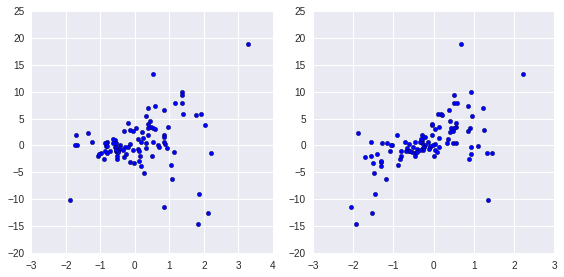

In [13]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

# 散点图判断x1,x2与y的关系，可以看出x2与y有较明显的线性关系。

In [14]:
data.shape

(100, 4)

In [15]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

In [16]:
result.summary()

# 观其结果发现，调整后的R²值较低，但除截距外，x1和x2都比较显著，可以大致判断出模型缺失了重要的自变量。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           8.36e-11
Time:                        21:38:27   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.011         0.228     1.746
x1             1.0810      0.391      2.766      0.007         0.305     1.857
x2             3.0793      0.432      7.134      0.000         2.223     3.936
==============================================================================
Omnibus:                       19.951   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.964
Skew:                          -0.660   Prob(JB):                     1.41e-11
Kurtosis:                       6.201   Cond. No.                         1.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# 可以进一步分析残差情况

result.resid.head()

# resid代表残差，是特定的

0    -3.370455
1   -11.153477
2   -11.721319
3    -0.948410
4     0.306215
dtype: float64

In [18]:
z, p = stats.normaltest(result.resid.values)

# 假设服从正态分布，p值太小，拒绝原假设，不服从正态分布

In [19]:
p

4.6524990253009038e-05

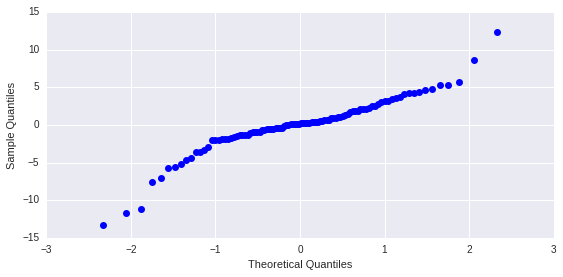

In [20]:
fig, ax = plt.subplots(figsize=(8,4))

smg.qqplot(result.resid, ax=ax)

fig.tight_layout()

# Q-Q图可以看出并没有落在y=x这条直线上，可以判断残差不服从正态分布

In [77]:
# 重新修改模型

model = smf.ols("y ~ x1 + x2 + x1:x2", data)
result = model.fit()

In [78]:
result.summary()

# 这个结果非常好。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           1.21e-64
Time:                        21:58:41   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.000         0.666     1.076
x1             1.9693      0.108     18.160      0.000         1.754     2.185
x2             2.9670      0.117     25.466      0.000         2.736     3.198
x1:x2          3.9440      0.112     35.159      0.000         3.721     4.167
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.734
Skew:                           0.327   Prob(JB):                        0.255
Kurtosis:                       2.521   Cond. No.                         1.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model2 = smf.ols("y~ -1 +x1+x2+ x1:x2", data)
result2 = model2.fit()

In [84]:
result2.summary()

# 不要截距项效果不如要截距项

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     389.4
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           6.10e-54
Time:                        21:59:49   Log-Likelihood:                -167.73
No. Observations:                 100   AIC:                             341.5
Df Residuals:                      97   BIC:                             349.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0864      0.141     14.780      0.000         1.806     2.367
x2             2.7613      0.150     18.465      0.000         2.465     3.058
x1:x2          3.9743      0.147     27.006      0.000         3.682     4.266
==============================================================================
Omnibus:                        2.855   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.806
Skew:                           0.359   Prob(JB):                        0.246
Kurtosis:                       2.603   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
z,p = stats.normaltest(result.resid.values)

In [86]:
p

0.22874710482505148

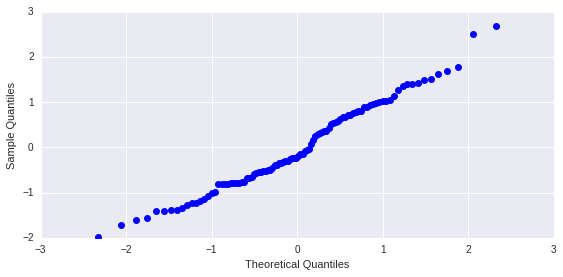

In [88]:
fig ,ax = plt.subplots(figsize=(8,4))

smg.qqplot(result.resid, ax=ax)

fig.tight_layout()

# Q-Q图在y=x上，服从正态分布

In [89]:
x = np.linspace(-1,1,50)

In [90]:
X1, X2 = np.meshgrid(x, x)

In [32]:
new_data = pd.DataFrame({"x1":X1.ravel(),"x2": X2.ravel(order='C')})

In [96]:
X1.ravel().shape

(2500,)

In [97]:
X1.ravel()

array([-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
        0.95918367,  1.        ])

In [98]:
X2.ravel()

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [36]:
X2.shape

(50, 50)

In [99]:
X2.ravel().shape

(2500,)

In [113]:
new_data.head(100)

,x1,x2
0,-1.000000,-1.000000
1,-0.959184,-1.000000
2,-0.918367,-1.000000
3,-0.877551,-1.000000
4,-0.836735,-1.000000
5,-0.795918,-1.000000
6,-0.755102,-1.000000
7,-0.714286,-1.000000
8,-0.673469,-1.000000
9,-0.632653,-1.000000


In [40]:
X1.ravel().shape

(2500,)

In [102]:
y_pred = result.predict(new_data)

In [103]:
y_pred.shape

(2500,)

In [104]:
y_pred = y_pred.reshape(50,50)

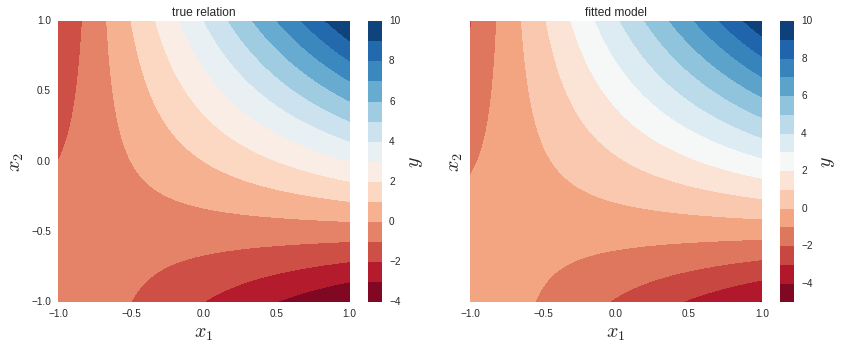

In [105]:
fig, axes = plt.subplots(1,2,figsize=(12,5),sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1,X2,Y,15,cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c,ax=ax)
    cb.set_label(r"$y$", fontsize=20)
    
plot_y_contour(axes[0],y_true(X1,X2), "true relation")
plot_y_contour(axes[1],y_pred,"fitted model")

fig.tight_layout()

### Datasets from R

In [114]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [115]:
dataset.title

'Ice Cream Consumption'

In [117]:
print(dataset.__doc__)

+------------+-------------------+
| Icecream   | R Documentation   |
+------------+-------------------+

Ice Cream Consumption
---------------------

Description
~~~~~~~~~~~

four–weekly observations from 1951–03–18 to 1953–07–11

*number of observations* : 30

*observation* : country

*country* : United States

Usage
~~~~~

::

    data(Icecream)

Format
~~~~~~

A time serie containing :

cons
    consumption of ice cream per head (in pints);

income
    average family income per week (in US Dollars);

price
    price of ice cream (per pint);

temp
    average temperature (in Fahrenheit);

Source
~~~~~~

Hildreth, C. and J. Lu (1960) *Demand relations with autocorrelated
disturbances*, Technical Bulletin No 2765, Michigan State University.

References
~~~~~~~~~~

Verbeek, Marno (2004) *A guide to modern econometrics*, John Wiley and
Sons,
`http://www.econ.kuleuven.ac.be/GME <http://www.econ.kuleuven.ac.be/GME>`__,
chapter 4.

See Also
~~~~~~~~

``Index.Source``, ``Index.Economics``, 

In [118]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


In [119]:
model = smf.ols("cons~ -1 +price +temp", data=dataset.data)
result = model.fit()

In [120]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1001.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           9.03e-27
Time:                        22:18:14   Log-Likelihood:                 51.903
No. Observations:                  30   AIC:                            -99.81
Df Residuals:                      28   BIC:                            -97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.000         0.535     0.916
temp           0.0032      0.000      6.549      0.000         0.002     0.004
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.675
Skew:                           0.776   Prob(JB):                        0.159
Kurtosis:                       3.729   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

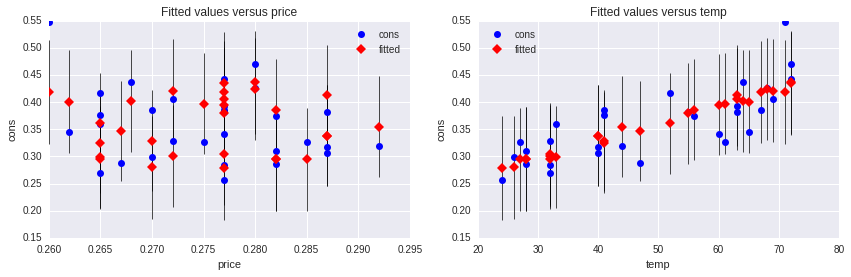

In [127]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

smg.plot_fit(result,0, ax=ax1)
smg.plot_fit(result,1,ax=ax2)

fig.tight_layout()

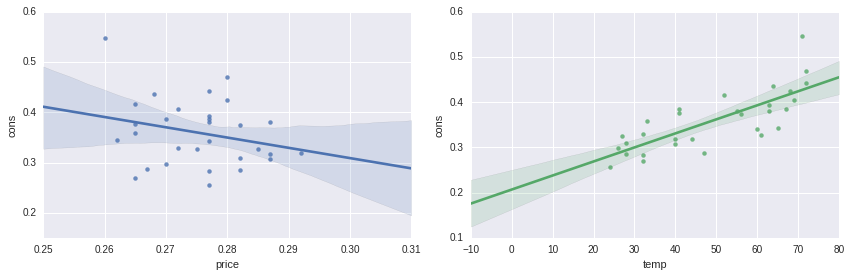

In [131]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.regplot("price","cons",dataset.data,ax=ax1)
sns.regplot("temp","cons",dataset.data,ax=ax2)

fig.tight_layout()

## 3.logistic regression

In [133]:
df = sm.datasets.get_rdataset("iris").data

In [134]:
df.info()

# Sepal花萼 Petal花瓣

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [135]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [163]:
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica")]

In [164]:
df_subset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [178]:
# 只选择两种花

df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica")].copy()

In [179]:
df_subset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [180]:
df_subset.Species = df_subset.Species.map({"versicolor":1, "virginica":0})

In [181]:
df_subset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [182]:
df_subset.rename(columns={"Sepal.Length":"Sepal_Length","Sepal.Width":"Sepal_Width",
                          "Petal.Length":"Petal_Length","Petal.Width":"Petal_Width"},inplace=True)

In [183]:
df_subset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


### 3.1 所有变量，含截距

In [ ]:
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)
result = model.fit()

In [186]:
result.summary()

# Sepal两个变量均不显著，
# 同时，可以考虑剔除截距项试试

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Jun 2016   Pseudo R-squ.:                  0.9142
Time:                        22:58:58   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097        -7.748    93.024
Sepal_Length     2.4652      2.394      1.030      0.303        -2.228     7.158
Sepal_Width      6.6809      4.480      1.491      0.136        -2.099    15.461
Petal_Length    -9.4294      4.737     -1.990      0.047       -18.714    -0.145
Petal_Width    -18.2861      9.743     -1.877      0.061       -37.381     0.809
================================================================================
"""

In [189]:
result.get_margeff().summary()

# 取弹性

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245        -0.031     0.120
Sepal_Width      0.1207      0.064      1.891      0.059        -0.004     0.246
Petal_Length    -0.1703      0.057     -2.965      0.003        -0.283    -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003        -0.546    -0.114
================================================================================
"""

### 3.2 所有变量，不含截距

In [187]:
model2 = smf.logit("Species ~ -1 + Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.108399
         Iterations 10


In [188]:
result2.summary()

# 可以发现结果好了很多
# 剔除截距项是因为根据实际情况，花瓣的这几种属性很难与截距项有关

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Jun 2016   Pseudo R-squ.:                  0.8436
Time:                        23:00:49   Log-Likelihood:                -10.840
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 3.502e-25
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Sepal_Length     6.3277      2.479      2.552      0.011         1.468    11.187
Sepal_Width      6.6182      2.529      2.616      0.009         1.661    11.576
Petal_Length    -8.4338      3.470     -2.431      0.015       -15.235    -1.633
Petal_Width    -10.2825      3.459     -2.972      0.003       -17.063    -3.502
================================================================================
"""

In [194]:
result2.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Sepal_Length     0.2079      0.060      3.449      0.001         0.090     0.326
Sepal_Width      0.2174      0.056      3.860      0.000         0.107     0.328
Petal_Length    -0.2771      0.090     -3.075      0.002        -0.454    -0.100
Petal_Width     -0.3378      0.044     -7.633      0.000        -0.425    -0.251
================================================================================
"""

### 3.3 剔除Sepal两个变量，含截距

In [190]:
model3 = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)
result3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [191]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Jun 2016   Pseudo R-squ.:                  0.8517
Time:                        23:07:24   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.303e-26
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001        18.594    71.951
Petal_Length    -5.7545      2.306     -2.496      0.013       -10.274    -1.235
Petal_Width    -10.4467      3.756     -2.782      0.005       -17.808    -3.086
================================================================================
"""

In [195]:
result3.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001        -0.275    -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000        -0.449    -0.181
================================================================================
"""

### 3.4 剔除Sepal两个变量，不含截距项

In [192]:
model4 = smf.logit("Species ~ -1+ Petal_Length + Petal_Width", data=df_subset)
result4 = model4.fit()

Optimization terminated successfully.
         Current function value: 0.523524
         Iterations 6


In [193]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2016   Pseudo R-squ.:                  0.2447
Time:                        23:08:00   Log-Likelihood:                -52.352
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 5.729e-09
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Petal_Length     2.0041      0.454      4.410      0.000         1.113     2.895
Petal_Width     -6.1127      1.371     -4.460      0.000        -8.799    -3.426
================================================================================
"""

In [196]:
result4.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Petal_Length     0.3529      0.045      7.825      0.000         0.264     0.441
Petal_Width     -1.0762      0.134     -8.053      0.000        -1.338    -0.814
================================================================================
"""

### 3.5 小结  

通过上面的分析，不难发现3.2和3.3的结果最好，我们可以通过通过拟合看哪种最优。

In [201]:
params2 = result2.params

In [202]:
params2

Sepal_Length     6.327719
Sepal_Width      6.618187
Petal_Length    -8.433801
Petal_Width    -10.282544
dtype: float64

In [199]:
params3 = result3.params

In [200]:
params3

Intercept       45.272344
Petal_Length    -5.754532
Petal_Width    -10.446700
dtype: float64

### 3.6 计算准确率

In [225]:
df_subset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [227]:
theta2 = np.array([params2['Sepal_Length'],params2['Sepal_Width'],params2['Petal_Length'],params2['Petal_Width']])

In [228]:
theta2

array([  6.32771938,   6.61818653,  -8.4338013 , -10.28254399])

In [229]:
theta3 = np.array([params3['Intercept'],params3['Petal_Length'],params3['Petal_Width']])

In [230]:
theta3

array([ 45.27234377,  -5.75453232, -10.44669989])

In [239]:
X2 = np.vstack([df_subset["Sepal_Length"],df_subset["Sepal_Width"],df_subset["Petal_Length"],df_subset["Petal_Width"]]).T

In [272]:
X3 = np.vstack([np.ones(100),df_subset["Petal_Length"],df_subset["Petal_Width"]]).T

In [271]:
X2.shape

(100, 4)

In [273]:
X3.shape

(100, 3)

#### 预测（根据3.2）

In [261]:
y2 = np.dot(X2,theta2)
y2.shape

(100,)

In [276]:
df_subset["Species_predict2"] = (y2 > 0.5).astype(int)

In [287]:
df_subset = df_subset.drop(df_subset.columns[[5]],axis=1);

In [288]:
df_subset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Species_predict2
50,7.0,3.2,4.7,1.4,1,1
51,6.4,3.2,4.5,1.5,1,1
52,6.9,3.1,4.9,1.5,1,1
53,5.5,2.3,4.0,1.3,1,1
54,6.5,2.8,4.6,1.5,1,1


In [289]:
p2 = sum(df_subset["Species_predict2"])/50.0
p2

# 普通理解

0.93999999999999995

In [301]:
df_subset_1 = df_subset[df_subset["Species"]==1]

In [304]:
df_subset_1.shape

(50, 7)

In [309]:
df_subset_0 = df_subset[df_subset["Species"]==0]

In [329]:
p2_TP = sum(df_subset_1["Species_predict2"] == df_subset_1["Species"] )/1.0
p2_TP

46.0

In [315]:
p2_TN=50.0-p2_TP
p2_TN

4.0

In [328]:
p2_FN = sum(df_subset_0["Species_predict2"] == df_subset_0["Species"] )/1.0
p2_FN

49.0

In [316]:
p2_FP = 50.0- p2_FN
p2_FP

1.0

In [331]:
Precision2 = p2_TP/(p2_TP+p2_FP)
Precision2

0.97872340425531912

In [336]:
Recall2 = p2_TP/(p2_TP + p2_FN)
Recall2

0.48421052631578948

In [345]:
F1_2 = 2*Precision2*Recall2/(Precision2+Recall2)
F1_2

0.647887323943662

#### 预测（根据3.3）

In [275]:
y3 = np.dot(X3,theta3)
y3.shape

(100,)

In [290]:
df_subset["Species_predict3"] = (y3 > 0.5).astype(int)

In [291]:
df_subset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Species_predict2,Species_predict3
50,7.0,3.2,4.7,1.4,1,1,1
51,6.4,3.2,4.5,1.5,1,1,1
52,6.9,3.1,4.9,1.5,1,1,1
53,5.5,2.3,4.0,1.3,1,1,1
54,6.5,2.8,4.6,1.5,1,1,1


In [292]:
p3 = sum(df_subset["Species_predict3"])/50.0
p3

0.97999999999999998

In [338]:
p3_TP = sum(df_subset_1["Species_predict3"] == df_subset_1["Species"] )/1.0
p3_TP

47.0

In [339]:
p3_TN=50.0-p3_TP
p3_TN

3.0

In [340]:
p3_FN = sum(df_subset_0["Species_predict3"] == df_subset_0["Species"] )/1.0
p3_FN

48.0

In [341]:
p3_FP = 50.0- p3_FN
p3_FP

2.0

In [342]:
Precision3 = p3_TP/(p3_TP+p3_FP)
Precision3

0.95918367346938771

In [343]:
Recall3 = p3_TP/(p3_TP + p3_FN)
Recall3

0.49473684210526314

In [348]:
F1_3 = 2*Precision3*Recall3/(Precision3+Recall3)
F1_3

0.65277777777777779

In [295]:
params3

Intercept       45.272344
Petal_Length    -5.754532
Petal_Width    -10.446700
dtype: float64

**通过对比，不难发现：3.3的结果要略微好于3.2的结果，因此我们选择3.3的模型：**  
`Intercept       45.272344`  
`Petal_Length    -5.754532`  
`Petal_Width    -10.446700`  
`dtype: float64`

### 3.7 拟合

**按result3(3.3)结果拟合**

In [204]:
beta0 = -params3['Intercept']/params3['Petal_Width']
beta1 = -params3['Petal_Length']/params3['Petal_Width']

In [208]:
df_subset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


In [205]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 +5,
                       "Petal_Width" :np.random.randn(20)*0.5+1.7})

In [209]:
df_new["P-Species"] = result3.predict(df_new)

In [210]:
df_new.head()

,Petal_Length,Petal_Width,P-Species
0,4.717684,1.218695,0.995472
1,5.280952,1.292013,0.799899
2,5.610778,2.230056,0.000033
3,4.458715,1.907844,0.421614
4,4.822227,1.938929,0.061070


In [211]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [212]:
df_new.head()

,Petal_Length,Petal_Width,P-Species,Species
0,4.717684,1.218695,0.995472,1
1,5.280952,1.292013,0.799899,1
2,5.610778,2.230056,0.000033,0
3,4.458715,1.907844,0.421614,0
4,4.822227,1.938929,0.061070,0


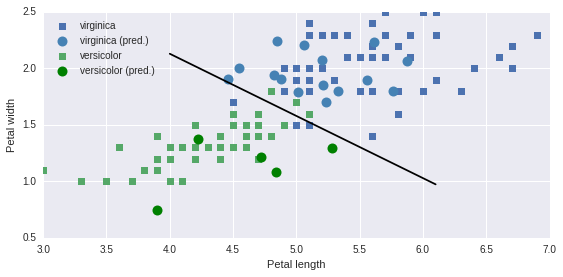

In [223]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0,6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()

## 4.Time series

In [1]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [2]:
!wc -l temperature_outdoor_2014.tsv

49548 temperature_outdoor_2014.tsv


In [13]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t",names=["time","temp"])

In [14]:
df.time = pd.to_datetime(df.time, unit="s")

In [15]:
df.head()

,time,temp
0,2013-12-31 23:03:06,4.38
1,2013-12-31 23:13:06,4.25
2,2013-12-31 23:23:07,4.19
3,2013-12-31 23:33:07,4.06
4,2013-12-31 23:43:08,4.06


In [16]:
df = df.set_index("time").resample("H").mean()

In [17]:
df.head()

,temp
time,
2013-12-31 23:00:00,4.166667
2014-01-01 00:00:00,3.851667
2014-01-01 01:00:00,3.610000
2014-01-01 02:00:00,3.376667
2014-01-01 03:00:00,3.303333


In [10]:
df.head()

,temp
time,
2013-12-31 23:00:00,4.166667
2014-01-01 00:00:00,3.851667
2014-01-01 01:00:00,3.610000
2014-01-01 02:00:00,3.376667
2014-01-01 03:00:00,3.303333


In [116]:
df.tail()

,temp
time,
2014-12-30 18:00:00,1.110000
2014-12-30 19:00:00,1.101667
2014-12-30 20:00:00,1.293333
2014-12-30 21:00:00,1.438333
2014-12-30 22:00:00,1.611667


In [117]:
df_march = df[df.index.month == 3]

In [118]:
df_april = df[df.index.month == 4]

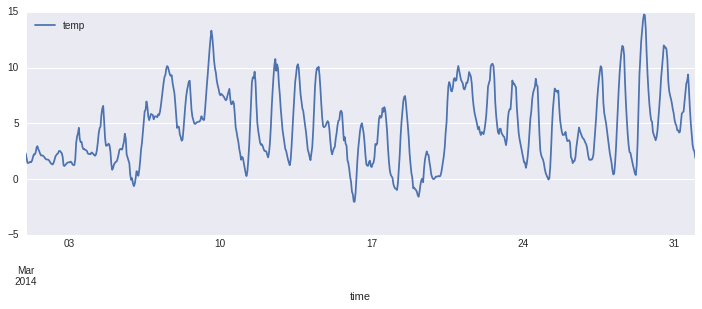

In [120]:
df_march.plot(figsize=(12,4));

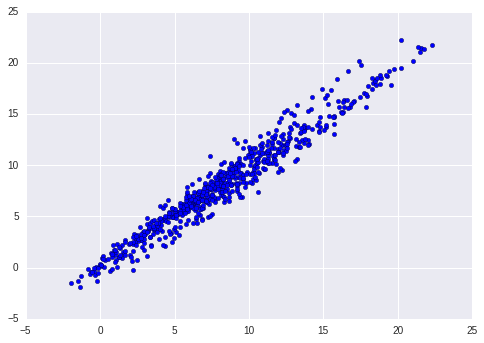

In [122]:
plt.scatter(df_april[1:], df_april[:-1]);

In [125]:
df_april.tail()

,temp
time,
2014-04-30 19:00:00,5.833333
2014-04-30 20:00:00,4.856667
2014-04-30 21:00:00,3.178333
2014-04-30 22:00:00,2.928333
2014-04-30 23:00:00,2.738333


In [127]:
df_april[:-1].tail()

,temp
time,
2014-04-30 18:00:00,7.395000
2014-04-30 19:00:00,5.833333
2014-04-30 20:00:00,4.856667
2014-04-30 21:00:00,3.178333
2014-04-30 22:00:00,2.928333


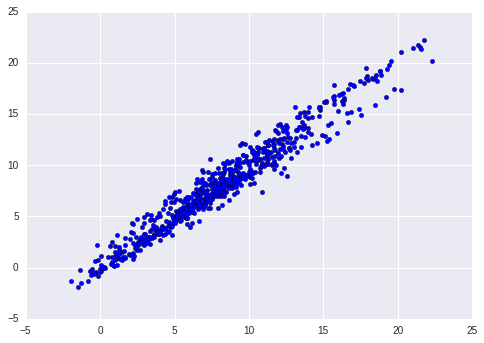

In [131]:
plt.scatter(df_april[:-1], df_april[1:]);

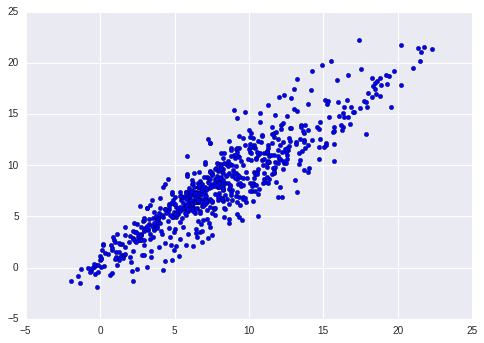

In [129]:
plt.scatter(df_april[2:], df_april[:-2]);

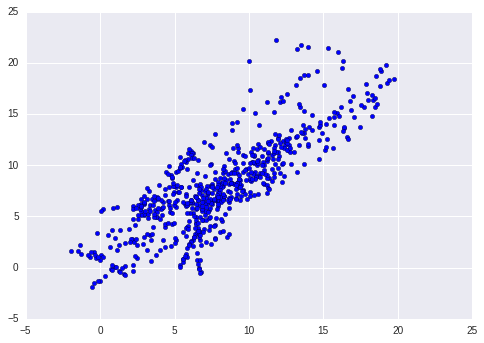

In [130]:
plt.scatter(df_april[24:], df_april[:-24]);

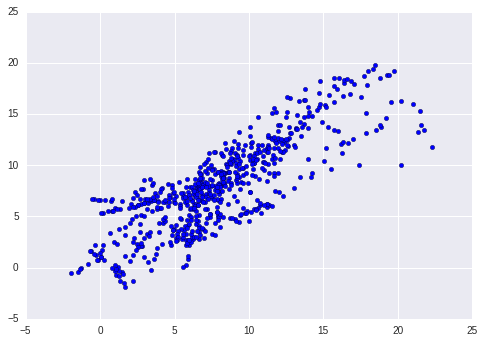

In [132]:
plt.scatter(df_april[:-24], df_april[24:]);

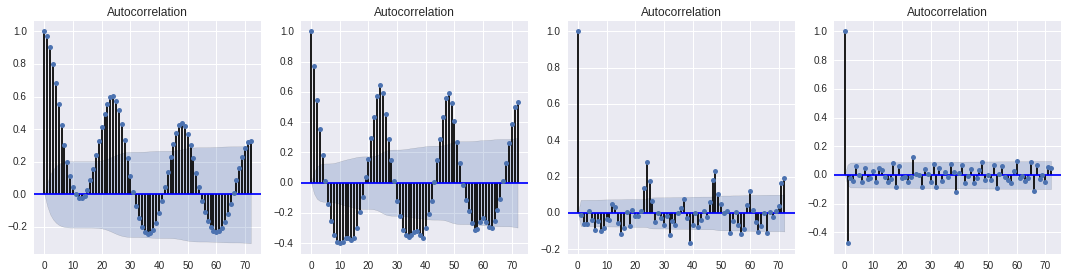

In [135]:
# 差分，可使非平稳时间序列变为平稳的；可以消除序列相关（自相关）。

fig, axes = plt.subplots(1,4,figsize=(15,4))

smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(),lags=72,ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])

fig.tight_layout()

# plot_acf在时间序列上可视化自相关；pacf偏相关。

In [136]:
model = sm.tsa.AR(df_march.temp)
result = model.fit(72)

# 72小时  
# AR模型（自回归模型）

In [137]:
sm.stats.durbin_watson(result.resid)

# DW=2，非自相关

1.9985623006352942

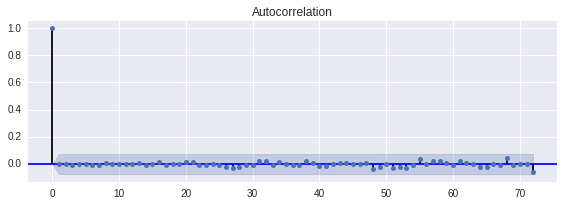

In [157]:
fig, ax = plt.subplots(1,1,figsize=(8,3))

smg.tsa.plot_acf(result.resid, lags=72, ax=ax)

fig.tight_layout()

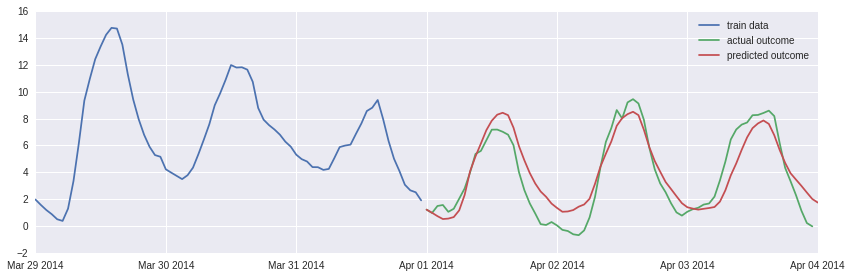

In [152]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:],label="train data")
ax.plot(df_april.index.values[:72],  df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-04", freq="H").values,
        result.predict("2014-04-01", "2014-04-04"), label="predicted outcome")
                       
ax.legend()
fig.tight_layout()

## 5.补充-ARIMA模型

### 5.1 获取数据

In [182]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

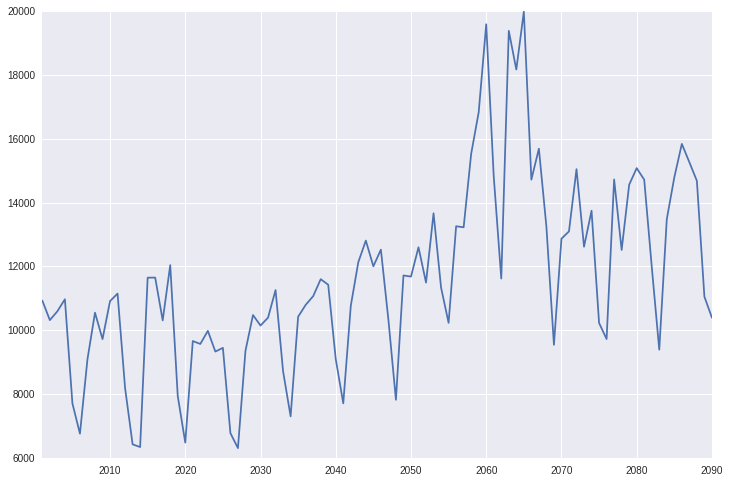

In [183]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize=(12,8))

非平稳序列，差分平稳后才能继续分析。

### 5.2 差分

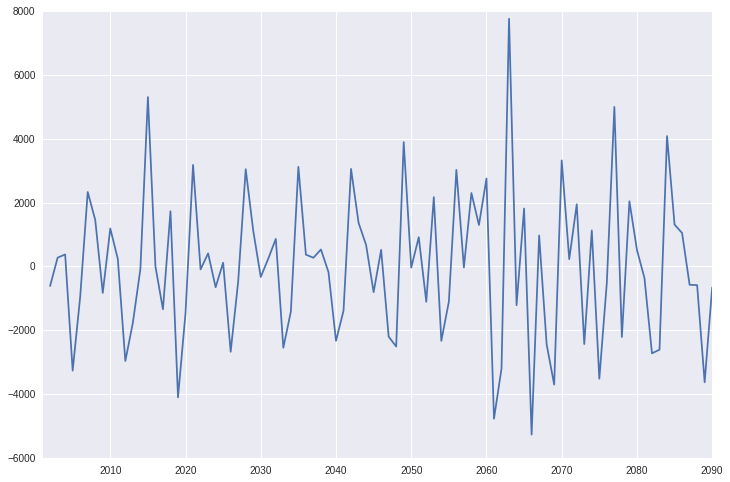

In [177]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1);

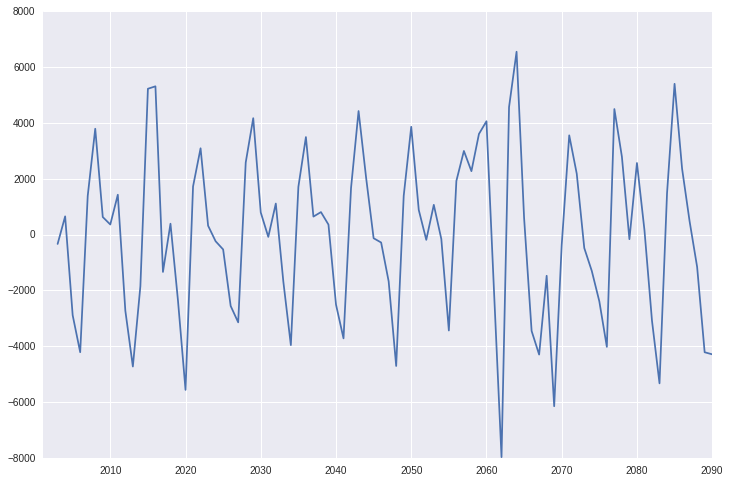

In [178]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
#diff2 = dta.diff().diff()
diff2 = dta.diff(2)
diff2.plot(ax=ax1);

一阶差分和二阶差分结果相差不大，所以一阶差分即可。$d=1$

### 5.3 确定$pq$

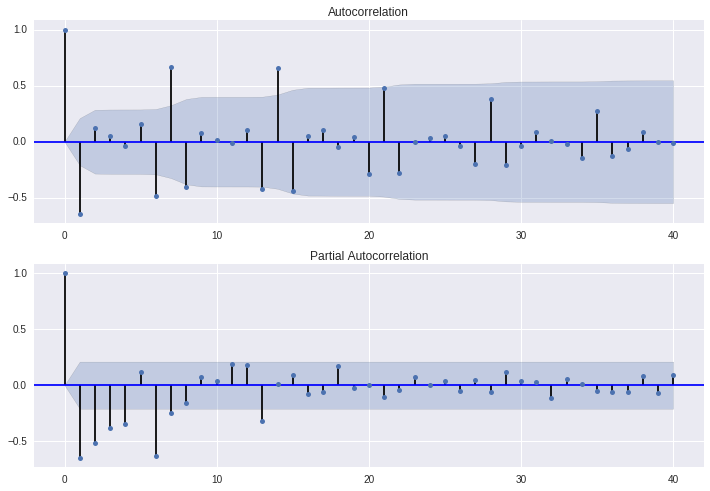

In [186]:
dta= dta.diff(1).dropna()
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = smg.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = smg.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [198]:
?sm.tsa.ARMA().fit()

In [236]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit([7,0])
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic);

arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic);

arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic); # 最佳

arma_mod40 = sm.tsa.ARMA(dta,(7,3)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic); 

arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit([8,0])
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic);

(1775.2509376690784, 1797.4441107369696, 1784.1874441034117)
(1681.756016837664, 1689.1537411936276, 1684.734852315775)


/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1571.151383190137, 1595.8104643766828, 1581.0808347838408)


/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1570.7849591529598, 1600.3758565768148, 1582.7003010654043)
(1746.3180705078958, 1770.9771516944415, 1756.2475221015995)


/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 5.4 检验

#### 5.4.1 残差自相关图

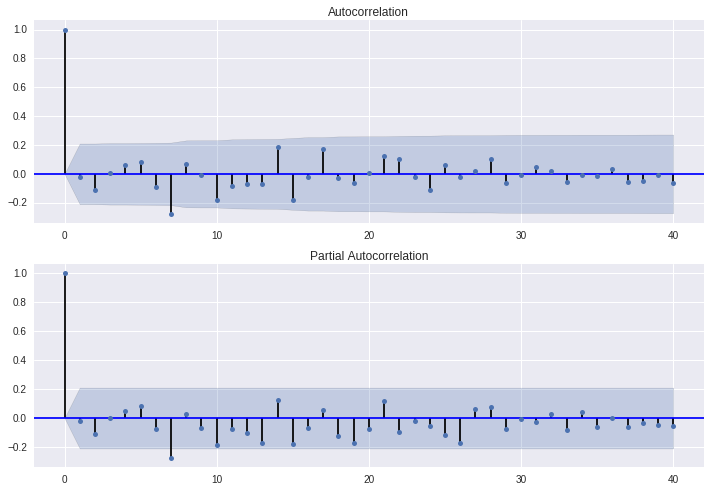

In [238]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = smg.tsa.plot_acf(arma_mod40.resid.values.squeeze(), lags=40, ax=ax1)
#fig = smg.tsa.plot_acf(arma_mod40.resid, lags=40, ax=ax1)
# >>> x = np.array([[[0], [1], [2]]])
# >>> x.shape
# (1, 3, 1)
# >>> np.squeeze(x).shape
# (3,)
# >>> np.squeeze(x, axis=(2,)).shape
# (1, 3)

ax2 = fig.add_subplot(212)
fig = smg.tsa.plot_pacf(arma_mod40.resid, lags=40, ax=ax2)

#### 5.4.3 DW检验

In [242]:
sm.stats.durbin_watson(arma_mod40.resid)

# 不存在自相关

2.0358318687112456

#### 5.4.4 正态检验

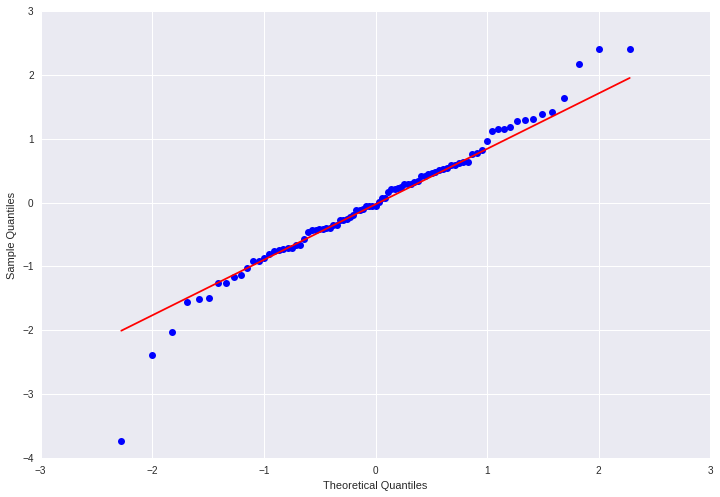

In [246]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = smg.qqplot(arma_mod40.resid, line='q', ax=ax, fit=True)

#### 5.4.5 LBQ检验

In [248]:
r,q,p = sm.tsa.acf(arma_mod40.resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.020471   0.037730  0.845987
2.0  -0.112776   1.196297  0.549829
3.0   0.002492   1.196869  0.753755
4.0   0.063803   1.576634  0.812985
5.0   0.081168   2.198747  0.821017
6.0  -0.089513   2.964684  0.813266
7.0  -0.278970  10.497094  0.162109
8.0   0.065524  10.917899  0.206395
9.0  -0.009576  10.927002  0.280746
10.0 -0.183077  14.297456  0.159851
11.0 -0.087195  15.072056  0.179222
12.0 -0.073670  15.632370  0.208660
13.0 -0.070837  16.157418  0.240734
14.0  0.188743  19.936004  0.132172
15.0 -0.179229  23.390556  0.076192
16.0 -0.022285  23.444716  0.102354
17.0  0.169918  26.638400  0.063589
18.0 -0.029631  26.736929  0.084064
19.0 -0.062183  27.177224  0.100592
20.0  0.009091  27.186775  0.130091
21.0  0.126976  29.078298  0.112134
22.0  0.103374  30.351279  0.110173
23.0 -0.018841  30.394225  0.138416
24.0 -0.114193  31.996908  0.127069
25.0  0.060644  32.456200  0.145232
26.0 -0.024973  32.535361  0

### 5.5 预测

2090-12-31    5262.798978
2091-12-31    2555.895769
2092-12-31   -7034.400541
2093-12-31    1922.871039
2094-12-31   -1199.920033
2095-12-31    1527.373711
2096-12-31   -1745.976015
2097-12-31    3273.176741
2098-12-31    1977.726427
2099-12-31   -4995.508222
2100-12-31     994.268316
Freq: A-DEC, dtype: float64


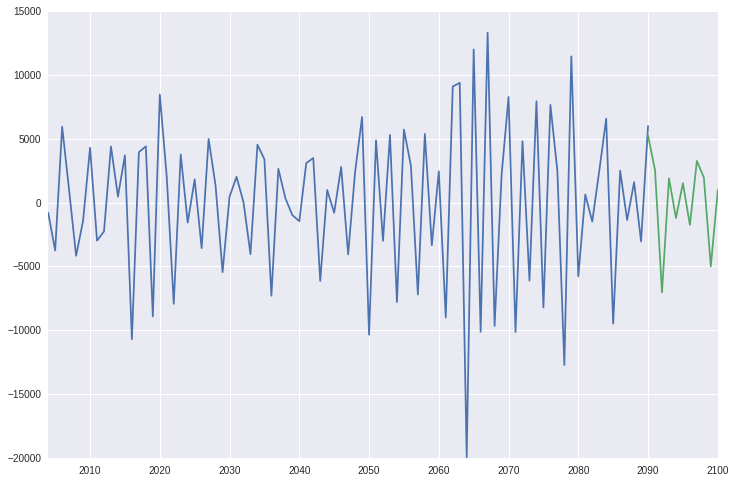

In [255]:
predict_sunspots = arma_mod40.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)